In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

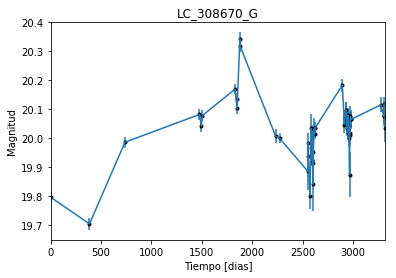

In [2]:
data = np.genfromtxt('LC_308670_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_308670_G')
plt.savefig("LC_308670_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

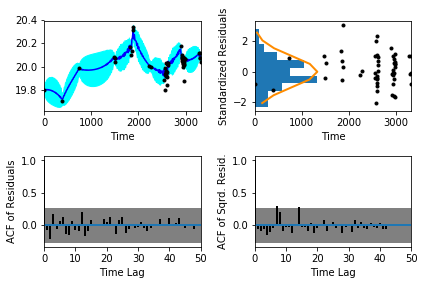

In [5]:
sample.assess_fit()

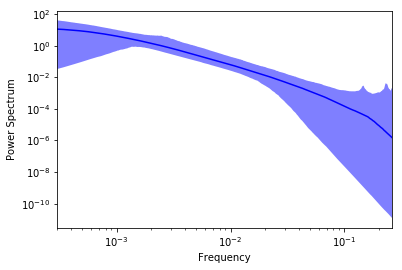

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

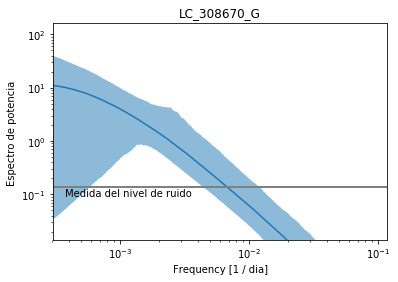

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_308670_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_308670_G')

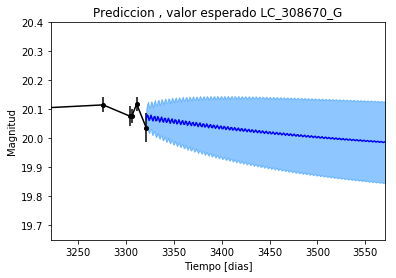

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_308670_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_308670_G')

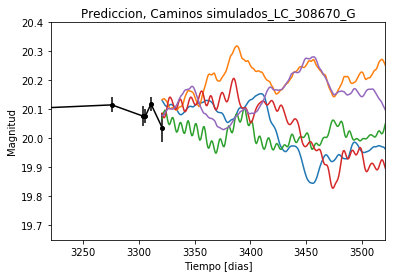

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_308670_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


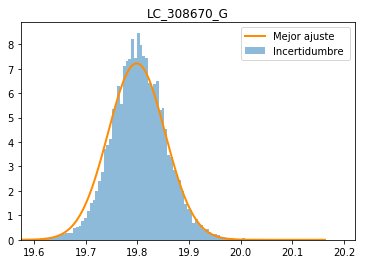

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_308670_G')
plt.savefig("Mejor_ajuste_LC_308670_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_308670_G')

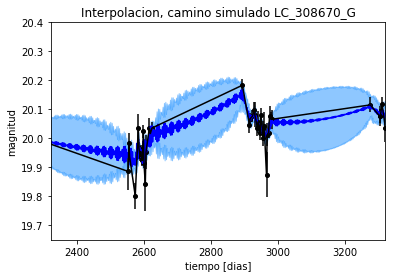

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_G')

Text(0.5,1,'Interpolacion, camino simulado LC_308670_G')

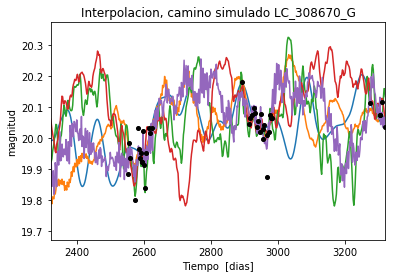

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1050.59968398
Median: 0.0175453807306
Standard deviation: 0.0980927130624
68% credibility interval: [ 0.00240081  0.10530342]
95% credibility interval: [ 0.00054731  0.40496062]
99% credibility interval: [  3.61664742e-04   4.98792470e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 690.933937612
Median: 0.00997078475159
Standard deviation: 0.0631231797455
68% credibility interval: [ 0.00117794  0.05619674]
95% credibility interval: [ 0.00038264  0.21966568]
99% credibility interval: [  3.16516702e-04   4.31629981e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 451.014842546
Median: 0.06996567539
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 649.861520513
Median: 91.2962261947
Standard deviation: 1.90234645505
68% credibility interval: [ 89.25776958  92.75935815]
95% credibility interval: [ 86.64224193  94.29948231]
99% credibility interval: [ 84.666617    94.95203656]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 588.797010447
Median: 0.905031373717
Standard deviation: 1.30406959421
68% credibility interval: [ 0.23653684  2.67405359]
95% credibility interval: [ 0.07361189  4.79436224]
99% credibility interval: [ 0.03147761  6.27060172]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 592.874643358
Median: 1.66624882411
Standard deviation: 3.34189350547
68% credibility interval: [ 0.14526299  5.64255375]
95% credibility interval: [  0.01914845  11

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2669.32148744
Median: 5.5843037164e-21
Standard deviation: 2.07971680223e+143
68% credibility interval: [  4.16085483e-55   7.47705581e-01]
95% credibility interval: [  2.35529183e-078   4.68771295e+121]
99% credibility interval: [  1.22290365e-156   2.31918734e+141]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1308.23823203
Median: 20.0086238779
Standard deviation: 0.077308645283
68% credibility interval: [ 19.93969413  20.07355538]
95% credibility interval: [ 19.84731832  20.1658684 ]
99% credibility interval: [ 19.77557734  20.24630185]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 572.611483341
Median: 0.148113746909
Standard deviation: 0.149665825295
68% credibility interval: [  2.64291981e-04   3.27281334e-01]
95% credibility interval: [ 0.          0.48608229]
99% credibility interval: [ 0.          0.51872625]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 572.611483341
Median: 0.148113746909
Standard deviation: 0.149665825295
68% credibility interval: [  2.64291981e-04   3.27281334e-01]
95% credibility interval: [ 0.          0.48608229]
99% credibility interval: [ 0.          0.51872625]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 366.348981445
Median: 0.0
Standard deviation: 0.0005

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 649.861520513
Median: 91.2962261947
Standard deviation: 1.90234645505
68% credibility interval: [ 89.25776958  92.75935815]
95% credibility interval: [ 86.64224193  94.29948231]
99% credibility interval: [ 84.666617    94.95203656]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1925.99388149
Median: 0.0295713052408
Standard deviation: 0.0183503641308
68% credibility interval: [ 0.01901201  0.04773552]
95% credibility interval: [ 0.01275533  0.08008023]
99% credibility interval: [ 0.01029657  0.11646009]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 407.826406892
Median: 1.21070765831
Standard deviation: 0.234096692809
68% credibility interval: [ 0.99490209  1.4570723 ]
95% credibility interval: [ 0.81436001  1.75024816]
99% credibility interval: [ 0.72761024  1.89078264]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 651.917227546
Median: 0.00384314209595
Standard deviation: 0.0676286986325
68% credibility interval: [  7.47192359e-06   4.48945038e-02]
95% credibility interval: [  2.93351082e-124   2.26803299e-001]
99% credibility interval: [  2.17789655e-143   4.50898612e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1050.59968398
Median: (-0.110240878415-0.816391192559j)
Standard deviation: 1.12435735091
68% credibility interval: [-0.66164093-2.72744238j -0.01508476-0.99047238j]
95% credibility interval: [-2.54444262-1.09063739j -0.00343887-0.90982234j]
99% credibility interval: [ -3.13400552e+00+0.j          -2.27240660e-03-0.00011998j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 690.933937612
Median: (-0.0626482882522+1.98803153821j)
Standard deviation: 1.0205950065
68% credibility interval: [-0.35309451+1.63801441j -0.00740123+1.68238455j]
95% credibility interval: [-1.38020020+0.46713483j -0.00240419+0.j        ]
99% credibility interval: [ -2.71201116e+00+2.91784821j  -1.98873309e-03+0.03409558j]
Posterior summary for par